###Data Science Project

###Question
+ Predict patients chance of high or low chance of survival from Hepatitis based on parameters using ML

###Workflow
+ Prepare Date
+ EDA
+ Feature selection
+ Build Model
+ Interpret Model
+ Streamlarize
+ Production with Streamlit and Flask

In [477]:
#Load EDA Pkgs
import pandas as pd
import numpy as np

In [478]:
#Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [479]:
#Load Data
df = pd.read_csv("data/hepatitis_dataset.csv")

In [480]:
#Preview Head
df.head()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116120,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116120,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.0,35.116120,1


In [481]:
#Clean Column Names
df.columns

Index(['class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver_big', 'Liver_firm', 'Spleen_palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [482]:
df.columns

Index(['class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver_big', 'Liver_firm', 'Spleen_palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [483]:
df.head()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116120,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116120,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.0,35.116120,1


In [484]:
#Data Types
df.dtypes

class                int64
Age                  int64
Sex                  int64
Steroid              int64
Antivirals           int64
Fatigue              int64
Malaise              int64
Anorexia             int64
Liver_big            int64
Liver_firm           int64
Spleen_palpable      int64
Spiders              int64
Ascites              int64
Varices              int64
Bilirubin          float64
Alk_phosphate      float64
Sgot                 int64
Albumin            float64
Protime            float64
Histology            int64
dtype: object

In [485]:
#Replace ? with 0
df = df.replace('?',0)


In [486]:
df.head()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116120,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116120,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.0,35.116120,1


In [487]:
df.dtypes

class                int64
Age                  int64
Sex                  int64
Steroid              int64
Antivirals           int64
Fatigue              int64
Malaise              int64
Anorexia             int64
Liver_big            int64
Liver_firm           int64
Spleen_palpable      int64
Spiders              int64
Ascites              int64
Varices              int64
Bilirubin          float64
Alk_phosphate      float64
Sgot                 int64
Albumin            float64
Protime            float64
Histology            int64
dtype: object

In [488]:
sum(df.dtypes == "object")

0

In [489]:
df.columns[df.dtypes == "object"]

Index([], dtype='object')

In [490]:
#Casting
#Converting from one data to another
df[['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_big', 'Liver_firm',
       'Spleen_palpable', 'Spiders', 'Ascites', 'Varices',
       'Alk_phosphate', 'Sgot', 'Protime']] = df[['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_big', 'Liver_firm',
       'Spleen_palpable', 'Spiders', 'Ascites', 'Varices',
       'Alk_phosphate', 'Sgot', 'Protime']].astype(int)

In [491]:
df.dtypes

class                int64
Age                  int64
Sex                  int64
Steroid              int64
Antivirals           int64
Fatigue              int64
Malaise              int64
Anorexia             int64
Liver_big            int64
Liver_firm           int64
Spleen_palpable      int64
Spiders              int64
Ascites              int64
Varices              int64
Bilirubin          float64
Alk_phosphate        int64
Sgot                 int64
Albumin            float64
Protime              int64
Histology            int64
dtype: object

In [492]:
df[['Bilirubin', 'Albumin']] = df[['Bilirubin', 'Albumin']].astype(float)

###Naratives
+ Most of the data were in objects format
+ Two of the date (Bilirubin and Albumin) were in float

In [493]:
### load
df = pd.read_csv("data/hepatitis_dataset.csv")

In [494]:
df.head()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116120,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116120,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.0,35.116120,1


In [495]:
df.count()

class              155
Age                155
Sex                155
Steroid            155
Antivirals         155
Fatigue            155
Malaise            155
Anorexia           155
Liver_big          155
Liver_firm         155
Spleen_palpable    155
Spiders            155
Ascites            155
Varices            155
Bilirubin          155
Alk_phosphate      155
Sgot               155
Albumin            155
Protime            155
Histology          155
dtype: int64

In [496]:
### Datate Shape
df.shape


(155, 20)

In [497]:
### MIssing Values
df.isnull().sum()

class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver_big          0
Liver_firm         0
Spleen_palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk_phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64

### EDA
+ Decriptive Analysis

In [498]:
df.describe()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.838710,1.348387,1.600000,1.780645,1.741935,1.509677,1.780645,1.645161,1.851613,1.864516,1.423513,101.266597,83.677419,3.776591,42.819020,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.368991,0.478004,0.491486,0.415151,0.507588,0.562551,0.415151,0.480015,0.356636,0.343349,1.188489,47.175284,89.527688,0.628368,30.143188,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,0.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,30.500000,3.423226,30.500000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,83.677419,55.000000,3.900000,35.116120,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [499]:
target_label = {"High":1, "Low": 2}

In [500]:
### Value Count for Class
df['class'].value_counts()


2    123
1     32
Name: class, dtype: int64

<AxesSubplot:>

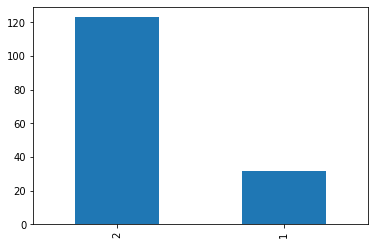

In [501]:
df['class'].value_counts().plot(kind="bar")

In [502]:
### Number of Males and Females
Sex_target_value = {"Male": 1, "Female": 2}

In [503]:
df['Sex'].unique()

array([2, 1])

In [504]:

df['Sex'].value_counts()

1    139
2     16
Name: Sex, dtype: int64

<AxesSubplot:>

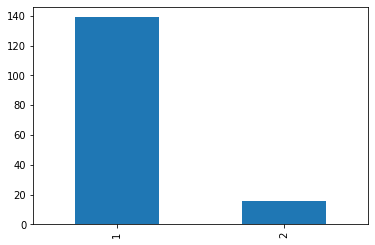

In [505]:
df['Sex'].value_counts().plot(kind="bar")

### Naratives
+ Here are more males than females in our date set

In [506]:
df.groupby(['Age', 'Sex']).size()

Age  Sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

### Frequency Distribution Table for Age

In [507]:
df['Age'].min()

7

In [508]:
df['Age'].max()

78

In [509]:
Age_labels = ["<10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70>"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
freq_df = df.groupby(pd.cut(df['Age'], bins=bins, labels=Age_labels)).size()

In [510]:

freq_df

Age
<10       1
10-20     3
20-30    29
30-40    50
40-50    35
50-60    24
60-70    11
70>       2
dtype: int64

In [511]:
freq_df = freq_df.reset_index(name='count')

In [512]:
freq_df

,Age,count
0,<10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70>,2


<AxesSubplot:>

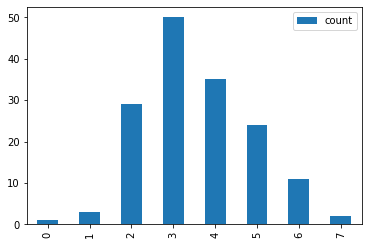

In [513]:
freq_df.plot(kind='bar')

<AxesSubplot:>

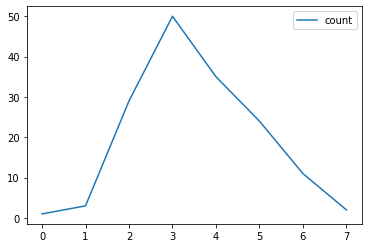

In [514]:
freq_df.plot(kind='line')

### Plot of Freq Table

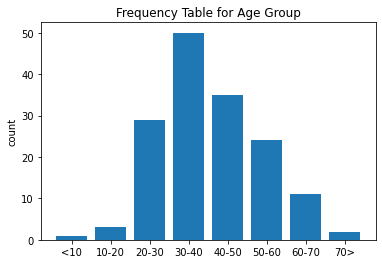

In [515]:
plt.bar(freq_df['Age'], freq_df['count'])
plt.ylabel('count')
plt.title('Frequency Table for Age Group')
plt.show()

### Naratives
+ The highest prevalence is from 30-40 Ages followed by 40-50, 
while the least is from Age group less than 10 followed by 70 and above

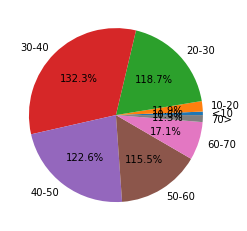

In [516]:
### Pie Chart
Age_labels = ["<10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70>"]
fig1, ax1 = plt.subplots()
ax1 = plt.pie(freq_df['count'],labels=Age_labels,autopct='1%.1f%%')
plt.show()

### Checking for Outlier
+ Univariate Analysis
+ Multivariate Analysis

### Method
+ Boxplot (Uni)
+ Scatterplot (Multi)
+ Z-score
+ IQR interquantile Range

<AxesSubplot:xlabel='Age'>

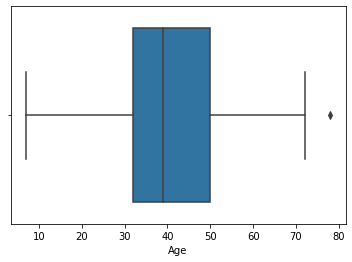

In [517]:
# Using Boxplot for Univariate Outlier Detection
import seaborn as sns
sns.boxplot(x = df['Age'])

In [518]:
df['Age'] == 78

0      False
1      False
2       True
3      False
4      False
       ...  
150    False
151    False
152    False
153    False
154    False
Name: Age, Length: 155, dtype: bool

In [519]:
df[df['Age'] == 78]

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32,4.0,35.11612,1


<AxesSubplot:xlabel='Steroid'>

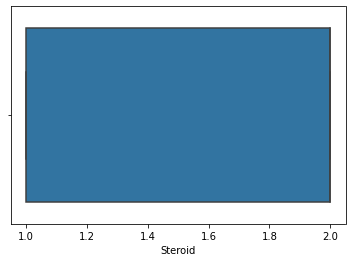

In [520]:
# Checking Outlier for Sterois using Boxplot
sns.boxplot(x=df['Steroid'])

<AxesSubplot:xlabel='Albumin', ylabel='Age'>

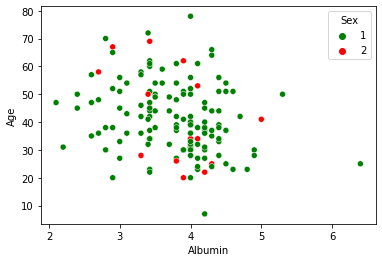

In [521]:
# Scatterplot
sns.scatterplot(y=df['Age'], x=df['Albumin'], hue=df['Sex'], palette=['green','red'], data=df)

### Interquartile Range (IQR)
+ H-spread/Mid-spread
+ Measures statistical dispersion of our data
+ IQR = Quantile 3(75) - Quantile 1 (25)

In [522]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 -Q1
IQR


class               0.000000
Age                18.000000
Sex                 0.000000
Steroid             1.000000
Antivirals          0.000000
Fatigue             1.000000
Malaise             1.000000
Anorexia            0.000000
Liver_big           0.000000
Liver_firm          1.000000
Spleen_palpable     0.000000
Spiders             1.000000
Ascites             0.000000
Varices             0.000000
Bilirubin           0.700000
Alk_phosphate      41.500000
Sgot               68.500000
Albumin             0.776774
Protime            34.500000
Histology           1.000000
dtype: float64

### The parameters that has Outlier
+ Alk_phosphate      
+ Sgot               
+ Age 
+ I will confirm using boxplot

<AxesSubplot:xlabel='Alk_phosphate'>

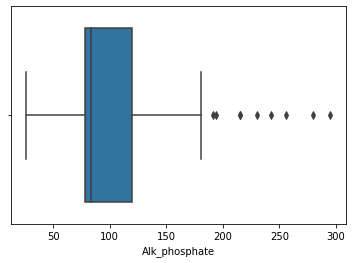

In [523]:
# Alk_phosphate
sns.boxplot(x = df['Alk_phosphate'])

<AxesSubplot:xlabel='Sgot'>

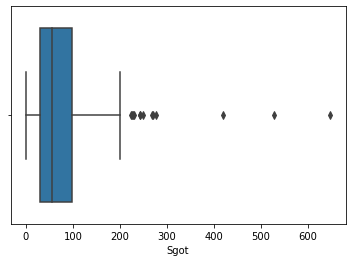

In [524]:
# Sgot
sns.boxplot(x = df['Sgot'])

<AxesSubplot:xlabel='Age'>

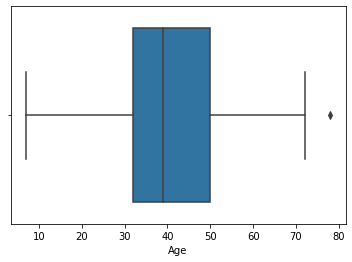

In [525]:
# Protime
sns.boxplot(x = df['Age'])

In [526]:
# Getting the actual dataset that is an outlier
actual_outlier = (df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))
actual_outlier

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### Narative for Outlier
+ The bool that is true is an outlier

#### Solution
+ Remove
+ Change
+ Ignore


In [527]:
#Another way of presenting the number of outlier
no_actual_outlier = df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any(axis=1)]
no_actual_outlier

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.000000,35.11612,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95.000000,28,4.000000,75.00000,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,0,3.423226,35.11612,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,83.677419,48,4.400000,35.11612,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,120,3.900000,35.11612,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57.000000,144,4.900000,78.00000,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102.000000,53,4.300000,35.11612,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62.000000,166,4.000000,63.00000,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53.000000,42,4.100000,85.00000,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.000000,20,4.000000,100.00000,1


In [528]:
print(df.shape)
print(no_actual_outlier.shape)


(155, 20)
(46, 20)


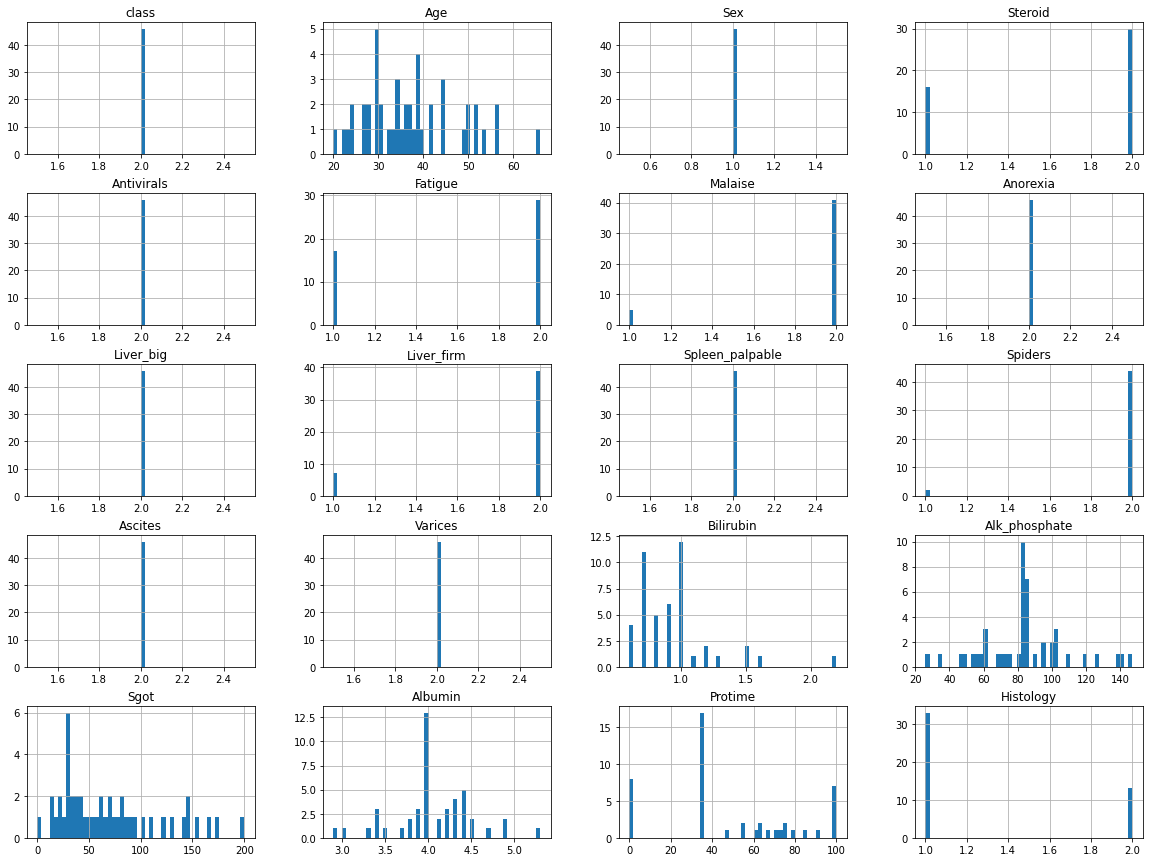

In [529]:
# Plot distribution of Data for No Outlier
no_actual_outlier.hist(bins=50, figsize=(20,15))
plt.show()

### Feature Selection
+ Select Kbest
  - Strong relationship with the output/target
+ Recursive feature elimination
    

In [530]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [531]:
#Features and Labels
df.head()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116120,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116120,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.0,35.116120,1


In [532]:
df.columns

Index(['class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver_big', 'Liver_firm', 'Spleen_palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [533]:
xFeatures = df[['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver_big', 'Liver_firm', 'Spleen_palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']]
yLabels = df['class']

In [534]:
#Using SKBest
skb =SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xFeatures, yLabels)

In [535]:
# Highest Score Shows Best Fit
print('Scores', best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.48448683   0.21403865   2.44428074
   2.56068979   0.19648065   0.16996481   0.73540863   1.07768131
   3.24607943   2.23517128   1.24073761  31.03129657  52.0603754
  47.38820795   3.62097382 155.82953805   3.01854675]


In [536]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(xFeatures)


In [537]:
bf_02

array([[30.      ,  2.      ,  2.      , ...,  4.      , 35.116129,
         1.      ],
       [50.      ,  1.      ,  2.      , ...,  3.5     , 35.11612 ,
         1.      ],
       [78.      ,  1.      ,  2.      , ...,  4.      , 35.11612 ,
         1.      ],
       ...,
       [61.      ,  1.      ,  1.      , ...,  4.1     , 35.11612 ,
         2.      ],
       [53.      ,  1.      ,  2.      , ...,  4.1     , 48.      ,
         2.      ],
       [43.      ,  1.      ,  2.      , ...,  3.1     , 42.      ,
         2.      ]])

In [538]:
# Mapping to the feature Names
Feature_score = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [539]:
Feature_score

,Feature_Scores
0,28.474819
1,0.389483
2,0.484487
3,0.214039
4,2.444281
5,2.560690
6,0.196481
7,0.169965
8,0.735409
9,1.077681


In [540]:
feature_columns_names = pd.DataFrame(xFeatures.columns, columns=['Feature_score'])
best_feat_df = pd.concat([Feature_score, feature_columns_names], axis=1)

In [541]:
best_feat_df

,Feature_Scores,Feature_score
0,28.474819,Age
1,0.389483,Sex
2,0.484487,Steroid
3,0.214039,Antivirals
4,2.444281,Fatigue
5,2.560690,Malaise
6,0.196481,Anorexia
7,0.169965,Liver_big
8,0.735409,Liver_firm
9,1.077681,Spleen_palpable


In [542]:
# Get Best
# The higher the number, the more important is the feature
best_feat_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_score
17,155.829538,Protime
14,52.060375,Alk_phosphate
15,47.388208,Sgot
13,31.031297,Bilirubin
0,28.474819,Age
16,3.620974,Albumin
10,3.246079,Spiders
18,3.018547,Histology
5,2.560690,Malaise
4,2.444281,Fatigue


In [543]:
best_feat_df.nlargest(12, 'Feature_Scores')

,Feature_Scores,Feature_score
17,155.829538,Protime
14,52.060375,Alk_phosphate
15,47.388208,Sgot
13,31.031297,Bilirubin
0,28.474819,Age
16,3.620974,Albumin
10,3.246079,Spiders
18,3.018547,Histology
5,2.560690,Malaise
4,2.444281,Fatigue


### Recursive Feature Elimination


In [544]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [545]:
logit = LogisticRegression()

In [546]:
rfe = RFE(logit)

In [547]:
rfe_fit = rfe.fit(xFeatures, yLabels)

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/chigozie/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [548]:
#Feature Selection
selected_features = pd.DataFrame(rfe_fit.support_, columns=['selected_features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['ranking_features'])

In [549]:
rfe_feature_df = pd.concat([feature_columns_names, selected_features, ranking_features], axis=1)

In [550]:
rfe_feature_df

,Feature_score,selected_features,ranking_features
0,Age,False,6
1,Sex,True,1
2,Steroid,False,3
3,Antivirals,False,7
4,Fatigue,True,1
5,Malaise,True,1
6,Anorexia,True,1
7,Liver_big,False,8
8,Liver_firm,False,5
9,Spleen_palpable,True,1


### Narative
+ Any features with lower ranking or true we will eliminate it

### Checking for feature Importance
+ ExtraTreesClassifier
+ Which feature is important

In [551]:
from sklearn.ensemble import ExtraTreesClassifier


In [552]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xFeatures, yLabels)

ExtraTreesClassifier()

In [553]:
# Print Important
print(et_clf.feature_importances_)

[0.05854189 0.02359561 0.02797369 0.01550621 0.02619352 0.04076046
 0.02588116 0.03240147 0.04491834 0.05190235 0.07904773 0.10762695
 0.0604182  0.09325427 0.07018662 0.0502173  0.08435711 0.06138486
 0.04583227]


In [554]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index= xFeatures.columns)

In [555]:
feature_importance_df

Age                0.058542
Sex                0.023596
Steroid            0.027974
Antivirals         0.015506
Fatigue            0.026194
Malaise            0.040760
Anorexia           0.025881
Liver_big          0.032401
Liver_firm         0.044918
Spleen_palpable    0.051902
Spiders            0.079048
Ascites            0.107627
Varices            0.060418
Bilirubin          0.093254
Alk_phosphate      0.070187
Sgot               0.050217
Albumin            0.084357
Protime            0.061385
Histology          0.045832
dtype: float64

<AxesSubplot:>

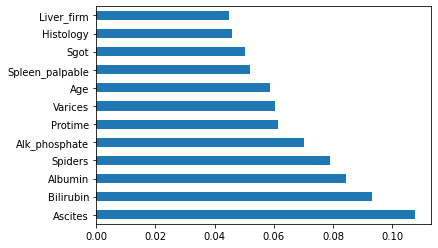

In [556]:
feature_importance_df.nlargest(12).plot(kind='barh')

### Narative
+ Almost all the methods gave us the same features to use

In [626]:
### Correlation
df.corr()

,class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
class,1.000000,-0.219647,0.173051,0.137413,-1.370020e-01,0.306049,3.318692e-01,0.114811,0.086382,0.150933,0.268886,0.387943,0.459669,0.356966,-0.450635,-0.124026,-0.056679,0.474229,0.218370,-0.337856
Age,-0.219647,1.000000,0.008126,-0.090466,-2.800922e-03,-0.278701,-1.099783e-01,0.118002,-0.109951,-0.100862,-0.088626,-0.167941,-0.057090,-0.041840,0.121587,0.018556,0.078021,-0.258079,-0.065122,0.170780
Sex,0.173051,0.008126,1.000000,-0.048985,-8.183020e-02,-0.070059,-2.597038e-02,0.026117,0.005408,-0.005855,-0.025125,-0.014296,0.141622,0.072352,-0.055063,0.101343,-0.008991,0.000711,0.065807,-0.137450
Steroid,0.137413,-0.090466,-0.048985,1.000000,6.112259e-02,0.175451,2.528979e-01,0.072636,0.188429,0.108990,0.103824,0.027843,-0.010072,-0.048901,-0.050739,-0.050924,-0.030734,0.238305,0.088221,-0.095367
Antivirals,-0.137002,-0.002801,-0.081830,0.061123,1.000000e+00,-0.047504,2.236070e-17,-0.020511,-0.015657,0.023210,-0.147679,-0.141915,-0.133708,-0.122348,0.180466,0.169473,0.110850,-0.166122,-0.246295,0.221720
Fatigue,0.306049,-0.278701,-0.070059,0.175451,-4.750406e-02,1.000000,5.970223e-01,0.354877,0.132089,0.253011,0.191266,0.372470,0.267129,0.170768,-0.273978,-0.152120,-0.192338,0.310884,0.122364,-0.146579
Malaise,0.331869,-0.109978,-0.025970,0.252898,2.236070e-17,0.597022,1.000000e+00,0.585572,0.130145,0.155006,0.044554,0.330289,0.326006,0.177007,-0.294751,-0.188930,-0.194798,0.297786,0.105414,-0.132314
Anorexia,0.114811,0.118002,0.026117,0.072636,-2.051103e-02,0.354877,5.855717e-01,1.000000,0.130218,0.092561,0.095771,0.356333,0.261167,0.245704,-0.332607,-0.098269,-0.197940,0.134695,0.139602,-0.051541
Liver_big,0.086382,-0.109951,0.005408,0.188429,-1.565737e-02,0.132089,1.301448e-01,0.130218,1.000000,0.645545,0.191848,0.261351,0.145798,-0.015625,-0.054939,-0.079485,0.035165,0.014746,0.155586,-0.152087
Liver_firm,0.150933,-0.100862,-0.005855,0.108990,2.320960e-02,0.253011,1.550065e-01,0.092561,0.645545,1.000000,0.231582,0.361482,0.185218,0.158116,-0.085056,-0.284209,-0.099473,0.168663,0.104102,-0.246860


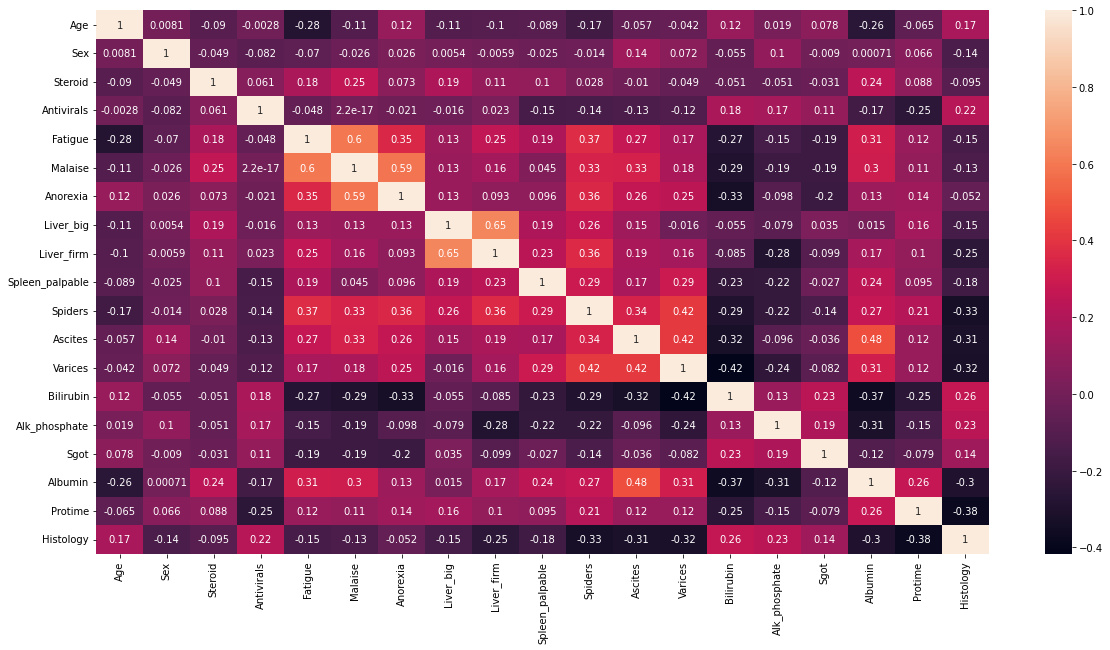

In [627]:
# HeatMap for Correlation with annotation
plt.figure(figsize=(20, 10))
sns.heatmap(xFeatures.corr(), annot= True)
plt.show()


### Model Building
+ Feature and Label
+Train/Test/Split
+ LogisticRegression
+ RF
+ DCT
+ Serialize



In [559]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [560]:
# Features for all Initial Data
df.columns


Index(['class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver_big', 'Liver_firm', 'Spleen_palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [561]:
xFeatures

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_big,Liver_firm,Spleen_palpable,Spiders,Ascites,Varices,Bilirubin,Alk_phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18,4.0,35.116129,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42,3.5,35.116120,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32,4.0,35.116120,1
3,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52,4.0,80.000000,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,83.677419,200,4.0,35.116120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,83.677419,242,3.3,50.000000,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142,4.3,35.116120,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20,4.1,35.116120,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19,4.1,48.000000,2


In [562]:
yLabels = df['class']

In [563]:
best_feat_df.nlargest(12, 'Feature_Scores')['Feature_score'].unique()

array(['Protime', 'Alk_phosphate', 'Sgot', 'Bilirubin', 'Age', 'Albumin',
       'Spiders', 'Histology', 'Malaise', 'Fatigue', 'Ascites', 'Varices'],
      dtype=object)

In [564]:
#Feature Selection
df.columns

Index(['class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver_big', 'Liver_firm', 'Spleen_palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [565]:
xFeature_best = df[['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology']]

In [566]:
#Train/Test Dataset
x_train, x_test, y_train, y_test = train_test_split(xFeatures, yLabels, test_size=0.30, random_state=7)

In [632]:
#Train/Test Best Features Dataset
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xFeature_best, yLabels, test_size=0.30, random_state=7)

In [634]:
#Building Model for Dataset
logreg = LogisticRegression()

In [636]:
logreg.fit(x_train_b, y_train_b)

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [638]:
# Model Accuracy
# Method 1
logreg.score(x_test_b, y_test_b)

0.723404255319149

In [639]:
# Method 2
logreg.predict(x_test_b)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [640]:
print(list(y_test_b))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [641]:
accuracy_score(y_test_b,logreg.predict(x_test_b))

0.723404255319149

In [642]:
#Building Model for Best Dataset
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [643]:
model_logit.score(x_test_b, y_test_b)

0.723404255319149

In [644]:
# Single Prediction
x_test_b.iloc[1]

Age               58.00000
Sex                1.00000
Steroid            2.00000
Antivirals         2.00000
Fatigue            1.00000
Spiders            1.00000
Ascites            2.00000
Varices            2.00000
Bilirubin          2.00000
Alk_phosphate    167.00000
Sgot             242.00000
Albumin            3.30000
Protime           35.11612
Histology          1.00000
Name: 76, dtype: float64

In [646]:
res_dic = {'High': 1, 'Low': 2}
x1 = x_test_b.iloc[1]

In [647]:
# Reshaping
logreg.predict(np.array(x1).reshape(1, -1))

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [579]:
# Alternative Algorithm


In [648]:
clf = DecisionTreeClassifier()

In [650]:
# Fit
clf.fit(x_train_b, y_train_b)

DecisionTreeClassifier()

In [651]:
# Model Accuracy Score
clf.score(x_test_b, y_test_b)

0.7021276595744681

In [652]:
# Method 3 KNN
from sklearn.neighbors import KNeighborsClassifier

In [657]:
knn = KNeighborsClassifier(n_neighbors=3)

In [658]:
#Fit
knn.fit(x_train_b, y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [659]:
# Accuracy Score
knn.score(x_test_b, y_test_b)

0.7659574468085106

### Save our Model
+ Serialization
+ pickle
+ joblib
+numpy/json/ray



In [660]:
# Using Joblib
import joblib
model_file = open("logistic_regression_hepB_model.pkl", "wb")
joblib.dump(model_logit, model_file)
model_file.close()

In [588]:
model_file_knn = open("knn_hepB_model.pkl", "wb")
joblib.dump(knn, model_file_knn)
model_file.close()

In [589]:
model_file_clf = open("decision_tree_clf_hepB_model.pkl", "wb")
joblib.dump(clf, model_file_clf)
model_file.close()

In [590]:
# Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [591]:
feature_names_best = xFeature_best.columns

In [592]:
target_names = ["High","Low"]


In [593]:
#Create a Dot Plot
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names_best, class_names= target_names)

In [594]:
# Draw Graph
graph = pydotplus.graph_from_dot_data(dot_data)

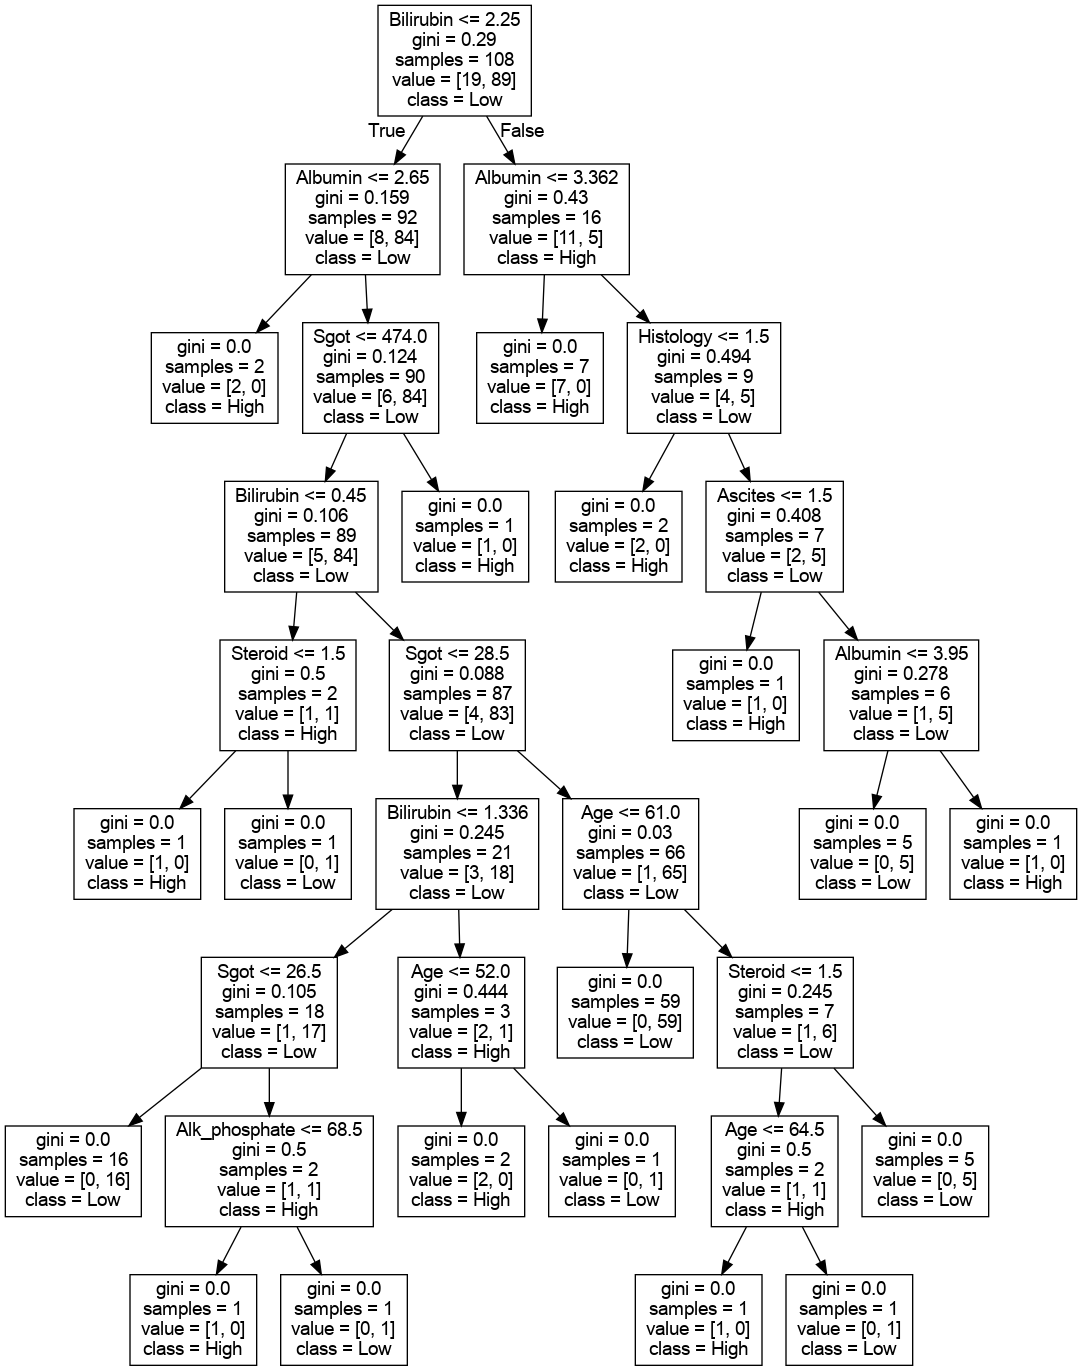

In [595]:
Image(graph.create_png())

In [596]:
# Save Our Decision Tree Plot
graph.write_png("hep_decision_tree_plot.png")

True

### Interpret & Evaluate Model
+ Elis5
+ Lime
+ SHAP
+ Skater 

In [597]:
# Interpreting with Lime
import lime
import lime.lime_tabular

In [598]:
# Methods and Attirbutes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

# Create Lime Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImAgeExplainer = ImAges

In [599]:
feature_names_best

Index(['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin', 'Protime',
       'Histology'],
      dtype='object')

In [600]:
target_names

['High', 'Low']

In [601]:
class_names = ["High(1)", "Low(2)"]


In [602]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values, 
                                                   feature_names=feature_names_best, 
                                                   class_names= class_names, 
                                                   discretize_continuous=True)

In [603]:
x1

Age               58.00000
Sex                1.00000
Steroid            2.00000
Antivirals         2.00000
Fatigue            1.00000
Spiders            1.00000
Ascites            2.00000
Varices            2.00000
Bilirubin          2.00000
Alk_phosphate    167.00000
Sgot             242.00000
Albumin            3.30000
Protime           35.11612
Histology          1.00000
Name: 76, dtype: float64

In [604]:
model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [605]:
exp = explainer.explain_instance(x_test_b.iloc[1], model_logit.predict_proba, num_features=14, top_labels=1)

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [661]:
exp.show_in_notebook(show_table=True, show_all=False)

In [662]:
# Explanation in List
exp.as_list()

[('Bilirubin > 1.50', -0.39773115061223235),
 ('Spiders <= 1.00', -0.2535543653273784),
 ('Sex <= 1.00', -0.21956180816082074),
 ('Alk_phosphate > 119.25', -0.13244674761931435),
 ('1.00 < Steroid <= 2.00', 0.13244077396461104),
 ('Age > 50.25', -0.11856028648207075),
 ('Albumin <= 3.42', -0.0971126726473361),
 ('Sgot > 90.50', 0.07311132109775106),
 ('Fatigue <= 1.00', 0.06071514744443159),
 ('Histology <= 1.00', -0.016395176281571146),
 ('31.00 < Protime <= 35.12', 0.005214384694451461),
 ('Antivirals <= 2.00', 0.0),
 ('Ascites <= 2.00', 0.0),
 ('Varices <= 2.00', 0.0)]

### Using Eli5

In [663]:
import eli5

In [609]:
# Show How each Features Contributes
eli5.show_weights(model_logit,top = 10)

In [610]:
feature_names_best = ['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'Alk_phosphate', 'Sgot', 'Albumin', 'Protime',
       'Histology']

In [611]:
# Show how each feature Contribute
eli5.show_weights(model_logit, feature_names=feature_names_best, target_names= class_names, top=10)

In [612]:
# Show how each feature Contribute
eli5.show_prediction(model_logit, x_test_b.iloc[1], feature_names=feature_names_best, target_names= class_names, top=10)

### Evaluation of Model
+ Confusion Tree
+ Classification report
+ Accuracy score


In [613]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [614]:
![](confusionmatrix_imAge.jpg)

/bin/bash: -c: line 0: syntax error near unexpected token `confusionmatrix_imAge.jpg'
/bin/bash: -c: line 0: `[](confusionmatrix_imAge.jpg)'


In [615]:
y_pred = model_logit.predict(x_test_b)

In [616]:
# Accuracy Score
accuracy_score(y_test, y_pred)

0.723404255319149

In [617]:
confusion_matrix(y_test, y_pred)

array([[ 2, 11],
       [ 2, 32]])

/home/chigozie/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


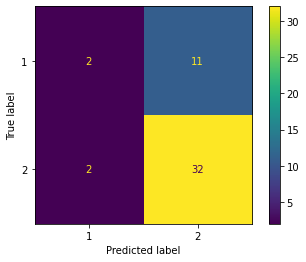

In [618]:
# Plot
plot_confusion_matrix(model_logit, x_test_b, y_test_b)

In [619]:
from sklearn.metrics import classification_report

In [620]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [621]:
#### Alternative :pandas_ML
#from pandas_ml import ConfusionMatrix
#from sklearn.metrics import jaccard_score
#cm = ConfusionMatrix(y_test, y_pred)


In [622]:
#cm.print_Stats()


In [623]:
#cm.plot(normalized=True)
#plt.show()

In [624]:
class_names

['High(1)', 'Low(2)']

In [625]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     High(1)       0.50      0.15      0.24        13
      Low(2)       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47

